In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from google.colab import files
df = files.upload()

Saving Bankruptcy_data(1)(1).xlsx to Bankruptcy_data(1)(1).xlsx


In [4]:
import io
dt = pd.read_excel(io.BytesIO(df['Bankruptcy_data(1)(1).xlsx']))

In [5]:
type(dt)

pandas.core.frame.DataFrame

In [6]:
dt.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [ ]:
dt.tail()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0
92871,-0.648028,-0.036524,-0.219774,-0.144842,0.693342,0.222476,-0.651048,-0.498483,55.624410,-0.063630,0.064574,0.062500,1


In [ ]:
null_count = dt.isnull().sum()
null_count

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

We need to replace null values and outliers with the mean of the data.

In [7]:
y = dt['BK']

In [8]:
dt1 = dt.drop(columns = ['BK']).copy() # We will exclude BK as it is the categorical dependent variable.
dt1.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030


We need to replace null values and extreme outliers of numeric data with the mean.

In [9]:
def replace_outliers_and_nulls_with_mean(df):
    replaced_df = df.copy()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.0 * IQR
        upper_bound = Q3 + 3.0 * IQR

        # Replace extreme outliers with NaN
        replaced_df[column] = replaced_df[column].apply(
            lambda x: x if lower_bound <= x <= upper_bound else pd.NA
        )

        # Replace null values with the mean of the column
        column_mean = replaced_df[column].mean()
        replaced_df[column].fillna(column_mean, inplace=True)

    return replaced_df


In [10]:
dt1 = replace_outliers_and_nulls_with_mean(dt1)
dt1.isnull().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
dtype: int64

In [11]:
dt1.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.055101,0.070823,0.032852
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030


In [ ]:
dt1.shape

(92872, 12)

In [23]:
X = dt1

In [ ]:
y.shape

(92872,)

In [12]:
data = pd.DataFrame()
data = pd.concat([data, dt1, y], axis = 1)
data.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.055101,0.070823,0.032852,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


Now the dataframe is ready for modeling :)

In [13]:
fd = data
type(fd)

pandas.core.frame.DataFrame

In [14]:
import plotly.graph_objects as go

In [15]:
fd['BK'] = fd['BK'].replace({0: 'No', 1: 'Yes'})

In [16]:
value_counts = fd['BK'].value_counts()

In [17]:
bal_bk = px.bar(data_frame = fd['BK'], x=value_counts.index, y=value_counts.values,text=value_counts.values ,labels={'x': 'Bankrupcy', 'y': 'Count'},
             title='Value Counts of Bankrupcy')
bal_bk.update_traces(texttemplate='%{text}', textposition='outside')
bal_bk.show()

In [18]:
per = value_counts / len(fd) * 100
per

No     99.399173
Yes     0.600827
Name: BK, dtype: float64

This shows that the data is very imbalanced, where 99.4 % of cases are no bankrupcy, and 0.6 % are bankrupt.

In [ ]:
fd.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92872.0,0.676633,1.570250,-5.144980,-0.110000,0.380000,1.410000,6.540000
Liquidity,92872.0,0.226766,0.284550,-1.120000,0.040000,0.210000,0.400000,1.000000
Profitability,92872.0,-0.091068,0.726971,-3.487742,-0.120000,0.070000,0.310000,2.660000
Productivity,92872.0,0.036029,0.150013,-0.570000,0.010000,0.060000,0.110000,0.620000
Leverage Ratio,92872.0,0.447279,0.688461,-2.460000,0.010000,0.320000,0.700945,3.280000
Asset Turnover,92872.0,0.965435,0.776074,-1.440000,0.390000,0.830000,1.350000,4.390000
Operational Margin,92872.0,0.075471,0.142072,-0.540000,0.040000,0.075471,0.130000,0.650000
Return on Equity,92872.0,0.000718,0.128656,-0.530000,-0.020000,0.030000,0.070000,0.520000
Market Book Ratio,92872.0,114.865110,183.137876,-674.530000,13.927500,66.230000,130.372500,926.910000
Assets Growth,92872.0,0.055101,0.231931,-0.786243,-0.036273,0.055101,0.133158,0.925800


Above is the descriptive statistics of the numeric features of our data.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
corr_matrix = fd.corr()
custom_color_scale = [[0, 'pink'], [0.18, 'white'], [1.0, 'green']]
fig = px.imshow(
    corr_matrix,
    color_continuous_scale=custom_color_scale,
    labels=dict(color='Correlation'),
)

# Add data labels
annotations = []
for i, row in enumerate(corr_matrix.index):
    for j, value in enumerate(corr_matrix.columns):
        annotations.append(dict(
            x=j,
            y=i,
            text=str(round(corr_matrix.iloc[i, j], 2)),
            showarrow=False,
            font=dict(size=10),
        ))

fig.update_layout(annotations=annotations)
fig.update_layout(
    title='Correlation Matrix Heatmap',
    width=900,
    height=900,
)
fig.update_layout(coloraxis_colorbar=dict(x=1.15))
fig.show()

<ipython-input-20-fd3bb91fa9cc>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



This heat map shows that there are no two variables that have correlation more than 0.6 both in positive and negative interaction. This shows that all the features are unique. Hence, we have to take all the features of our data in the prediction model.

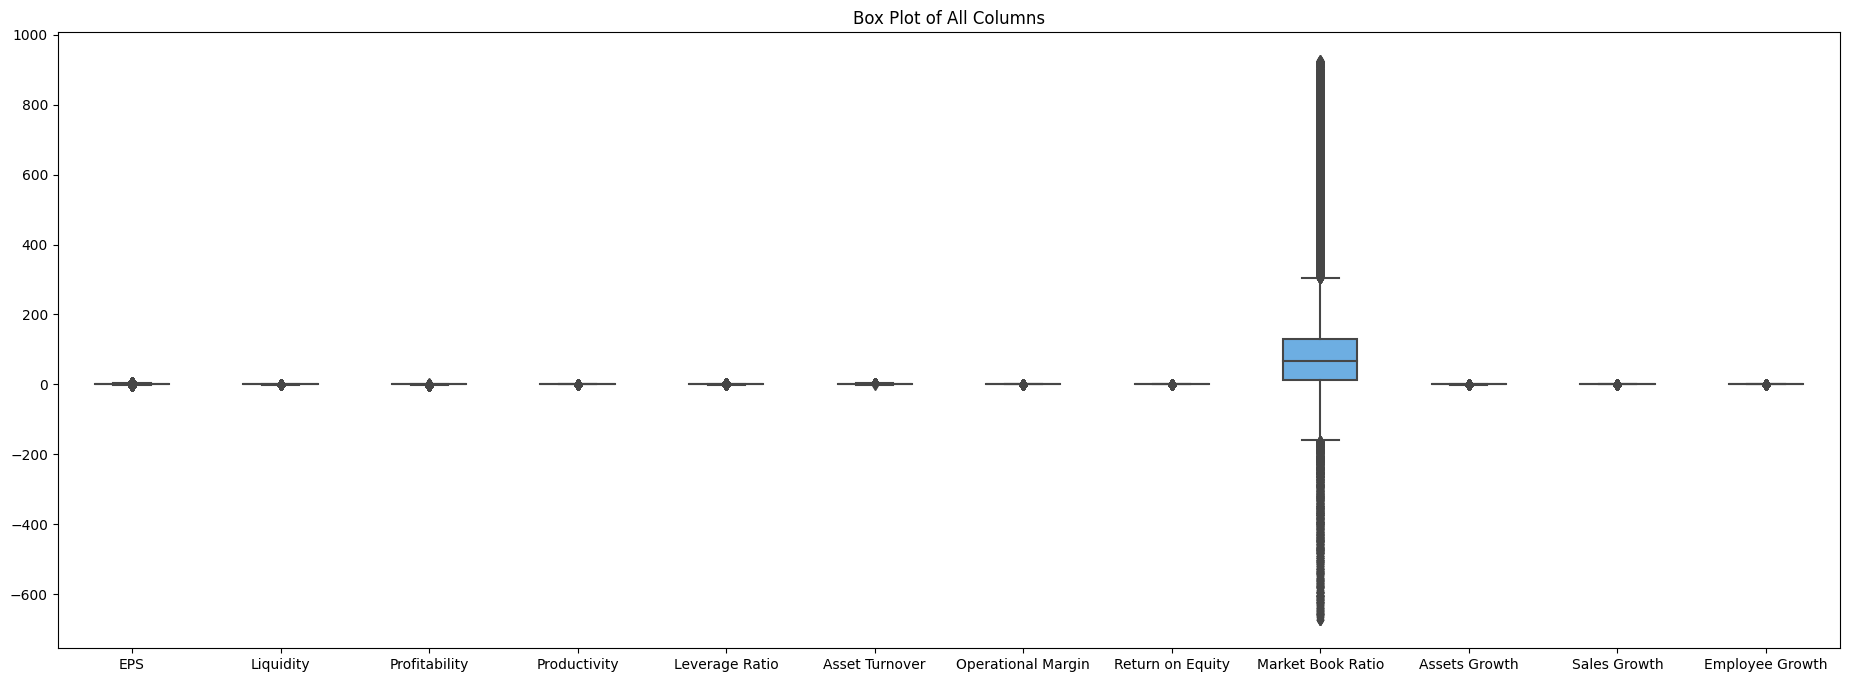

In [21]:
plt.figure(figsize=(23, 8))
sns.boxplot(data=fd, width=0.5)
plt.title('Box Plot of All Columns')
plt.show()

The data is scattered at different scales, so scaling is required.

In [24]:
X.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.055101,0.070823,0.032852
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030


In [25]:
from sklearn.preprocessing import MinMaxScaler

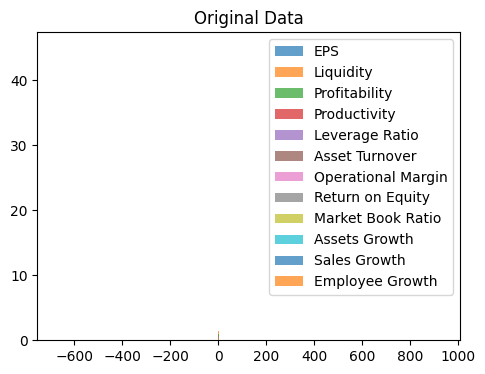

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for col in X.columns:
    plt.hist(X[col], bins='auto', alpha=0.7, label=col, density=True)
plt.legend()
plt.title('Original Data')
plt.show()

Here, it can be seen that since there is irregular scaling of data, the histogram is not at all visible, and is miniaturized near 0.

In [28]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

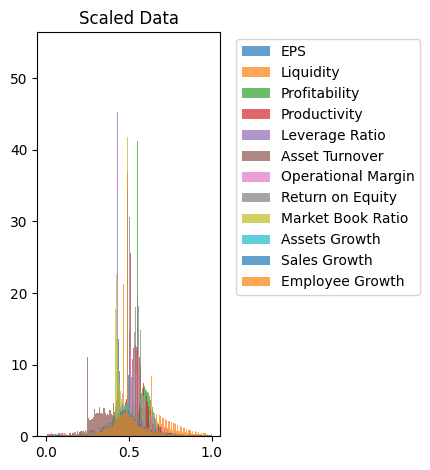

In [29]:
plt.subplot(1, 2, 2)
for col in X.columns:
    plt.hist(X[col], bins='auto', alpha=0.7, label=col, density=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scaled Data')
plt.tight_layout()
plt.show()

Now, after the MinMax scaling, the data is normalized, and very much visible at same scale.

Now, I am going to use Logistic regression and SVM models to predict bankrupcy.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Tackeling oversampling of data.

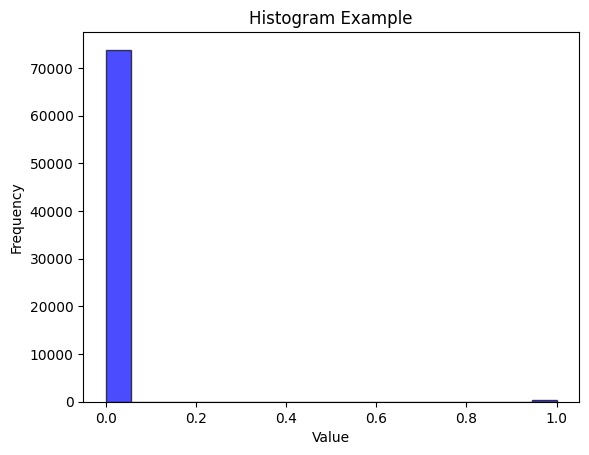

In [32]:
plt.hist(y_train, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

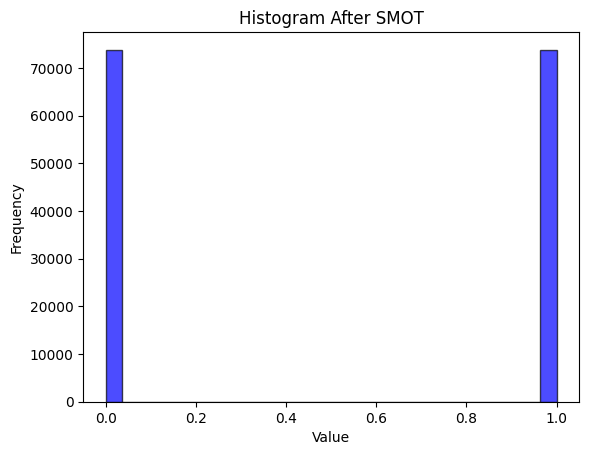

In [99]:
plt.hist(y_train, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram After SMOT')
plt.show()

### First, let use Logistic Regression

In [36]:
model1 = LogisticRegression()

In [37]:
model1.fit(X_train, y_train)

LogisticRegression()

In [38]:
lry_pred = model1.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, lry_pred))
print("Classification Report:\n", classification_report(y_test, lry_pred))

Accuracy: 0.8071063257065949
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89     18461
           1       0.02      0.74      0.04       114

    accuracy                           0.81     18575
   macro avg       0.51      0.77      0.47     18575
weighted avg       0.99      0.81      0.89     18575



In [40]:
cm = confusion_matrix(y_test, lry_pred)

In [41]:
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + true_negative)/len(lry_pred)*100,1),'%')

Confusion Matrix:
 [[14908  3553]
 [   30    84]] 

True Positive: 84
False Positive: 3553
True Negative: 14908
False Negative: 30
Correct predictions: 80.7 %


### Now, lets use Support Vector Machine.

In [63]:
from sklearn.svm import SVC

In [64]:
model2 = SVC()

In [65]:
model2.fit(X_train, y_train)

SVC()

In [66]:
svmy_pred = model2.predict(X_test)

In [67]:
print("Accuracy:", accuracy_score(y_test, svmy_pred))
print("Classification Report:\n", classification_report(y_test, svmy_pred))

Accuracy: 0.9232839838492598
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     18461
           1       0.03      0.42      0.06       114

    accuracy                           0.92     18575
   macro avg       0.52      0.67      0.51     18575
weighted avg       0.99      0.92      0.95     18575



In [68]:
cm = confusion_matrix(y_test, svmy_pred)

In [69]:
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + true_negative)/len(svmy_pred)*100,1),'%')

Confusion Matrix:
 [[17102  1359]
 [   66    48]] 

True Positive: 48
False Positive: 1359
True Negative: 17102
False Negative: 66
Correct predictions: 92.3 %


### Using Random Forest model:

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [44]:
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
rny_pred = model3.predict(X_test)

In [47]:
print("Accuracy:", accuracy_score(y_test, rny_pred))
print("Classification Report:\n", classification_report(y_test, rny_pred))

Accuracy: 0.9872947510094212
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18461
           1       0.13      0.18      0.15       114

    accuracy                           0.99     18575
   macro avg       0.56      0.59      0.57     18575
weighted avg       0.99      0.99      0.99     18575



In [48]:
cm = confusion_matrix(y_test, rny_pred)

In [49]:
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + true_negative)/len(rny_pred)*100,1),'%')

Confusion Matrix:
 [[18318   143]
 [   93    21]] 

True Positive: 21
False Positive: 143
True Negative: 18318
False Negative: 93
Correct predictions: 98.7 %


Now with Decision tree:

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model4 = DecisionTreeClassifier(random_state=42)

In [52]:
model4.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
dty_pred = model4.predict(X_test)

In [59]:
print("Accuracy:", accuracy_score(y_test, dty_pred))
print("Classification Report:\n", classification_report(y_test, dty_pred))

Accuracy: 0.9704979811574698
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     18461
           1       0.06      0.25      0.09       114

    accuracy                           0.97     18575
   macro avg       0.53      0.61      0.54     18575
weighted avg       0.99      0.97      0.98     18575



In [57]:
cm = confusion_matrix(y_test, dty_pred)

In [58]:
true_positive=cm[1][1]
false_positive=cm[0][1]
true_negative=cm[0][0]
false_negative=cm[1][0]

print("Confusion Matrix:\n", cm, "\n")
print("True Positive:",true_positive )
print("False Positive:",false_positive )
print("True Negative:",true_negative )
print("False Negative:",false_negative )
print("Correct predictions:",round((true_positive + true_negative)/len(dty_pred)*100,1),'%')

Confusion Matrix:
 [[17999   462]
 [   86    28]] 

True Positive: 28
False Positive: 462
True Negative: 17999
False Negative: 86
Correct predictions: 97.0 %


### Now lets compare these models:

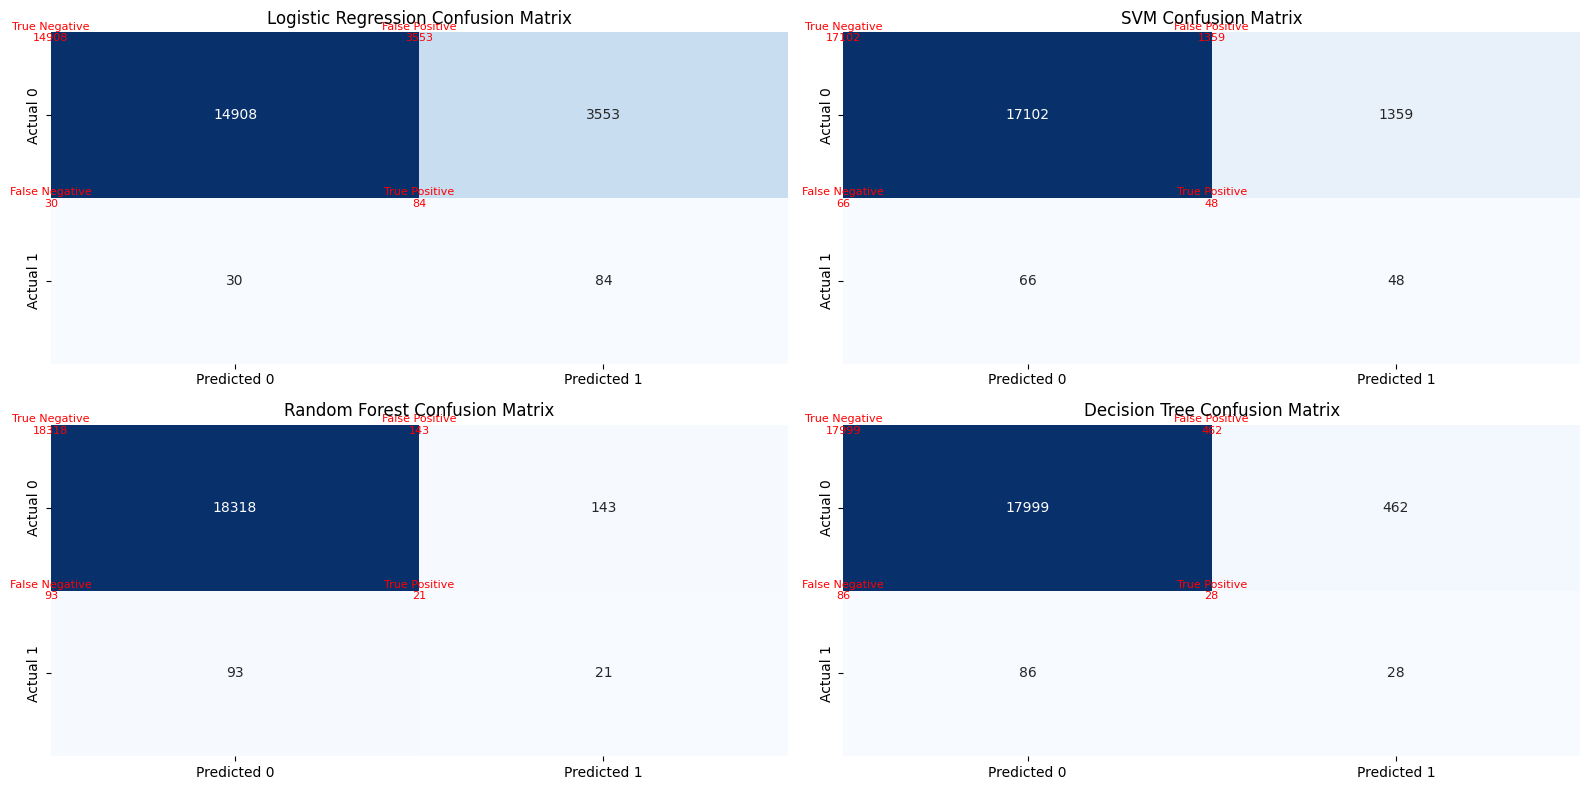

In [73]:
cm_lr = confusion_matrix(y_test, lry_pred)

cm_svm = confusion_matrix(y_test, svmy_pred)

cm_rn = confusion_matrix(y_test, rny_pred)

cm_dt = confusion_matrix(y_test, dty_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

plt.figure(figsize=(16, 8))

#Plot confusion matrix for Logistic Regression
plt.subplot(2, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual 0', 'Actual 1'])
for i in range(4):
    plt.text(i % 2, i // 2, f"{labels[i]}\n{cm_lr.flatten()[i]}", ha='center', va='center', fontsize=8, color='red')

# Plot confusion matrix for SVM
plt.subplot(2, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual 0', 'Actual 1'])
for i in range(4):
    plt.text(i % 2, i // 2, f"{labels[i]}\n{cm_svm.flatten()[i]}", ha='center', va='center', fontsize=8, color='red')

# Plot confusion matrix for Random Forest
plt.subplot(2, 2, 3)
sns.heatmap(cm_rn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual 0', 'Actual 1'])
for i in range(4):
    plt.text(i % 2, i // 2, f"{labels[i]}\n{cm_rn.flatten()[i]}", ha='center', va='center', fontsize=8, color='red')

# Plot confusion matrix for Decision Tree
plt.subplot(2, 2, 4)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual 0', 'Actual 1'])
for i in range(4):
    plt.text(i % 2, i // 2, f"{labels[i]}\n{cm_dt.flatten()[i]}", ha='center', va='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()


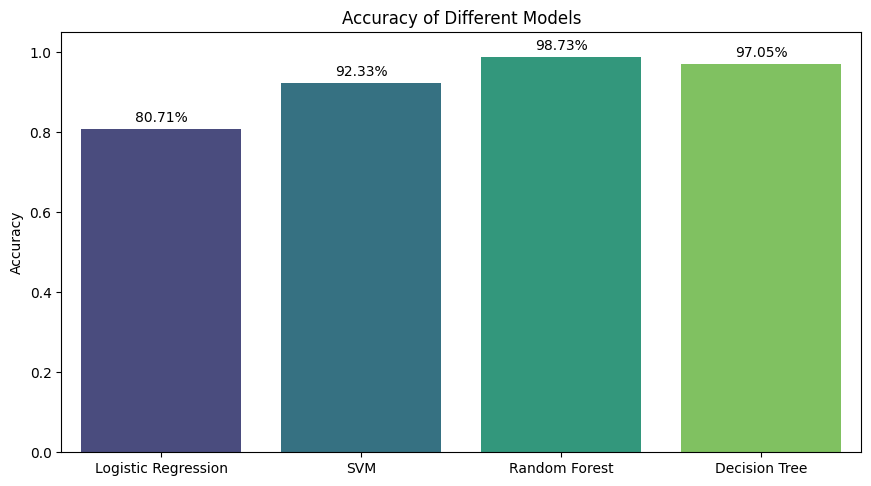

In [84]:
accuracy_lr = accuracy_score(y_test, lry_pred)
accuracy_svm = accuracy_score(y_test, svmy_pred)
accuracy_rf = accuracy_score(y_test, rny_pred)
accuracy_dt = accuracy_score(y_test, dty_pred)

accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_dt]
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=models, y=accuracies, palette='viridis')

for i, v in enumerate(accuracies):
    barplot.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontsize=10)

plt.title('Accuracy of Different Models')
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1)
plt.show()

The above visualization shows that Random Forest has the maximum accuracy for determining Bankrupcy.
Now, lets do Hyperparameter tuning for random forest using grid search method:

In [85]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'n_estimators': [50, 100],        # Number of trees in the forest
    'max_depth': [10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]          # Minimum number of samples required to be at a leaf node
}

grid = GridSearchCV(model3, param_grid, cv=3, scoring='accuracy', n_jobs = -1)

In [93]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [98]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test,grid_predictions)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=20, random_state=42)


<Axes: >

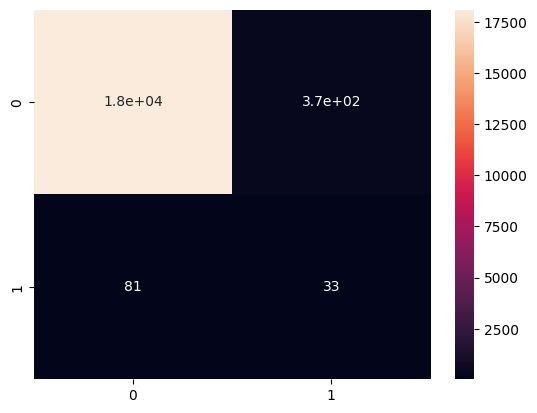

In [95]:
sns.heatmap(cmG, annot=True)

In [96]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18461
           1       0.08      0.29      0.13       114

    accuracy                           0.98     18575
   macro avg       0.54      0.63      0.56     18575
weighted avg       0.99      0.98      0.98     18575

